# Series de Taylor

In [1]:
from typing import Callable
import sympy as sym
from IPython.display import display


def taylor_approx(*, fcn: Callable[[float], float], x0: float, n: int) -> sym.Symbol:
    """Approximate a function using the Taylor nth polynomial.
    ## Parameters
    ``fcn``: function to approximate
    ``x0``: point to approximate around
    ``n``: number of terms in the approximation
    ## Return
    ``taylor``: the Taylor nth polynomial
    """
    x = sym.symbols("x")
    f = sym.sympify(fcn(x))
    taylor: sym.Symbol = 0
    for i in range(n + 1):
        taylor += f.diff(x, i).subs(x, x0) / sym.factorial(i) * (x - x0) ** i
        # display(taylor)

    return taylor

Para la función $\dfrac{1}{25 x^2+1}$ en el punto $x_0 = 0$

1th Taylor Polynomial:


1

2th Taylor Polynomial:


1 - 25*x**2

3th Taylor Polynomial:


1 - 25*x**2

4th Taylor Polynomial:


625*x**4 - 25*x**2 + 1

5th Taylor Polynomial:


625*x**4 - 25*x**2 + 1

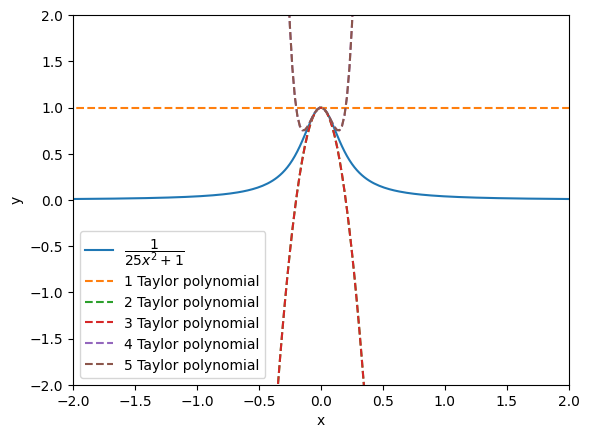

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Define the function fcn
x = sym.symbols("x")
fcn = lambda x: 1 / (25*x**2+1)
x0 = 0

# Define the range of x values
x_vals = np.linspace(-10, 10, 1000)

# Plot the function fcn
plt.plot(x_vals, fcn(x_vals), label="$\dfrac{1}{25 x^2+1}$")

# Plot the first 4 approximations using the Taylor series
for n in range(1, 6):
    approx = taylor_approx(fcn=fcn, x0=x0, n=n)
    print(f"{n}th Taylor Polynomial:")
    display(approx)
    plt.plot(
        x_vals,
        [approx.subs(x, val) for val in x_vals],
        "--",
        label=f"{n} Taylor polynomial",
    )

# Add labels and legend
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.ylim(-2, 2)
plt.xlim(-2, 2)
# Show the plot
plt.show()

Para la función $\arctan{(x)}$ en el punto $x_0 = 1$

1th Taylor Polynomial:


x/2 - 1/2 + pi/4

2th Taylor Polynomial:


x/2 - (x - 1)**2/4 - 1/2 + pi/4

3th Taylor Polynomial:


x/2 + (x - 1)**3/12 - (x - 1)**2/4 - 1/2 + pi/4

4th Taylor Polynomial:


x/2 + (x - 1)**3/12 - (x - 1)**2/4 - 1/2 + pi/4

5th Taylor Polynomial:


x/2 - (x - 1)**5/40 + (x - 1)**3/12 - (x - 1)**2/4 - 1/2 + pi/4

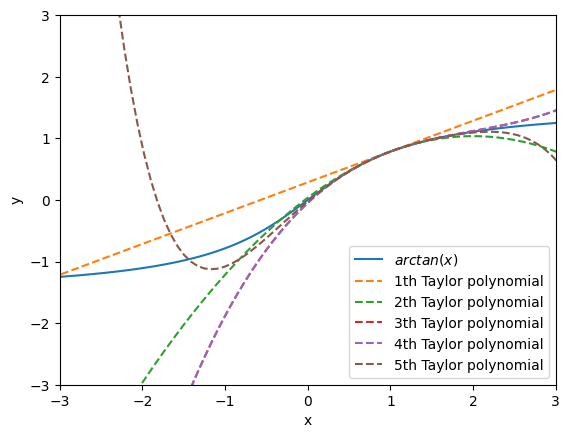

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import sympy as sym
from typing import Callable

# Define the function fcn
x = sym.symbols('x')
fcn = lambda x_val: sym.atan(x_val)
x0 = 1

# Define the range of x values
x_vals = np.linspace(-4, 4, 100)

# Lambdify the function for plotting
fcn_lambdified = sym.lambdify(x, fcn(x), modules='numpy')

# Plot the function fcn
plt.plot(x_vals, fcn_lambdified(x_vals), label="$arctan{(x)}$")

# Plot the first 4 approximations using the Taylor series
for n in range(1, 6):
    approx = taylor_approx(fcn=fcn, x0=x0, n=n)
    print(f"{n}th Taylor Polynomial:")
    display(approx)
    approx_lambdified = sym.lambdify(x, approx, modules='numpy')
    plt.plot(
        x_vals,
        approx_lambdified(x_vals),
        "--",
        label=f"{n}th Taylor polynomial",
    )

# Add labels and legend
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.ylim(-3, 3)
plt.xlim(-3, 3)
# Show the plot
plt.show()


# Polinomios de Lagrange

In [4]:
def lagrange_approx(*, xs: list[float], ys: list[float]) -> sym.Symbol:
    """Approximate a set of points using Lagrange polynomials.

    ## Parameters
    ``x``: list of x values
    ``y``: list of y values

    ## Return
    ``lagrange``: the Lagrange polynomial

    """

    x = sym.symbols("x")
    lagrange: sym.Symbol = sym.S.Zero

    # -- Summation of the Lagrange polynomials
    for i in range(len(xs)):

        # -- Calculation of the Lagrange polynomial
        term = sym.S.One
        for j in range(len(xs)):
            if i != j:
                term *= (x - xs[j]) / (xs[i] - xs[j])
        term = sym.expand(term)
        lagrange += term * ys[i]

    return lagrange

Para la función $\dfrac{1}{25 x^2+1}$

[0. 3.]
[1.0, 0.004424778761061947]


1.0 - 0.331858407079646*x

[0.  1.5 3. ]
[1.0, 0.017467248908296942, 0.004424778761061947]


0.215442284654326*x**2 - 0.978185261042625*x + 1.0

[0. 1. 2. 3.]
[1.0, 0.038461538461538464, 0.009900990099009901, 0.004424778761061947]


-0.151648929358559*x**3 + 0.921435744663643*x**2 - 1.73132527684355*x + 1.0

[0.   0.75 1.5  2.25 3.  ]
[1.0, 0.06639004149377593, 0.017467248908296942, 0.007839294463498285, 0.004424778761061947]


0.106970986453563*x**4 - 0.815351593225752*x**3 + 2.19973141752659*x**2 - 2.48110495487385*x + 1.0

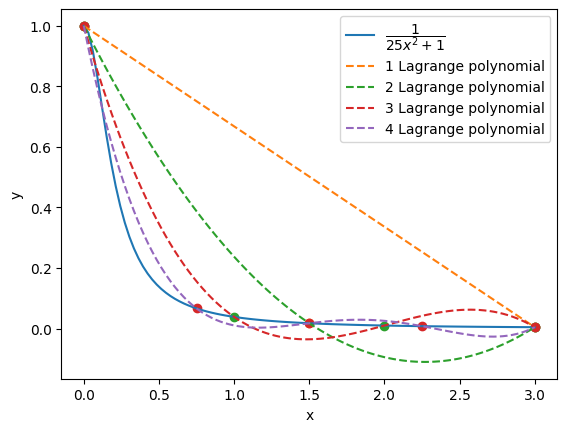

In [5]:
eqn = lambda x: 1 / (25*x**2+1)

rango = [0, 3]

x_vals = np.linspace(rango[0], rango[1], 100)
plt.plot(x_vals, [eqn(x_i) for x_i in x_vals], label="$\dfrac{1}{25 x^2+1}$")

for n in range(1, 5):
    xs = np.linspace(rango[0], rango[1], n + 1)
    print(xs)

    ys = [eqn(x) for x in xs]
    print(ys)

    r = lagrange_approx(xs=xs, ys=ys)
    display(r)
    # print(r, end="\n\n")
    plt.scatter(xs, ys, label="")

    xp = np.linspace(rango[0], rango[1], 100)
    yp = [r.subs(x, val) for val in xp]

    plt.plot(xp, yp, "--", label=f"{n} Lagrange polynomial")


# Add labels and legend
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
# plt.ylim(0, 100)
# plt.xlim(0, 3)
# Show the plot
plt.show()

Para la función $\arctan{(x)}$

[-3.  3.]
[-1.24904577239825, 1.24904577239825]


0.416348590799418*x

[-3.  0.  3.]
[-1.24904577239825, 0, 1.24904577239825]


0.416348590799418*x

[-3. -1.  1.  3.]
[-1.24904577239825, -0.785398163397448, 0.785398163397448, 1.24904577239825]


-0.0461311965747538*x**3 + 0.831529359972202*x

[-3.  -1.5  0.   1.5  3. ]
[-1.24904577239825, -0.982793723247329, 0, 0.982793723247329, 1.24904577239825]


1.73472347597681e-18*x**4 - 0.035384774029452*x**3 + 2.42861286636753e-17*x**2 + 0.734811557064486*x

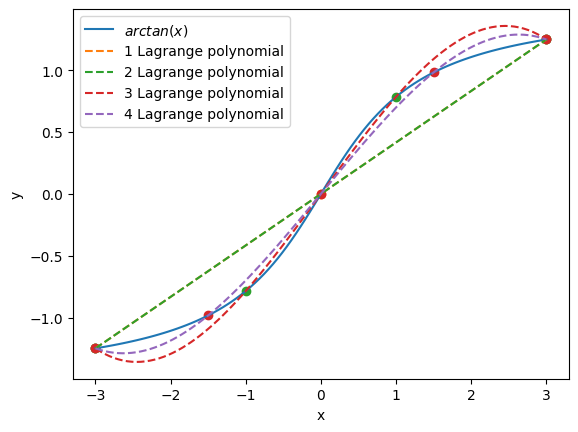

In [6]:
eqn = lambda x: sym.atan(x)

rango = [-3, 3]

x_vals = np.linspace(rango[0], rango[1], 100)
plt.plot(x_vals, [eqn(x_i) for x_i in x_vals], label="$arctan{(x)}$")

for n in range(1, 5):
    xs = np.linspace(rango[0], rango[1], n + 1)
    print(xs)

    ys = [eqn(x) for x in xs]
    print(ys)

    r = lagrange_approx(xs=xs, ys=ys)
    display(r)
    # print(r, end="\n\n")
    plt.scatter(xs, ys, label="")

    xp = np.linspace(rango[0], rango[1], 100)
    yp = [r.subs(x, val) for val in xp]

    plt.plot(xp, yp, "--", label=f"{n} Lagrange polynomial")


# Add labels and legend
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
# plt.ylim(0, 100)
# plt.xlim(0, 3)
# Show the plot
plt.show()